# Validation

In [1]:
# Setting seeds to try and ensure we have the same results - this is not guaranteed across PyTorch releases.
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(0)

In [2]:
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn

mean, std = (0.5,), (0.5,)

# Create a transform and normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                              ])

# Download FMNIST training dataset and load training data
trainset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download FMNIST test dataset and load test data
testset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [3]:
class FMNIST(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)
    
  def forward(self, x):
    x = x.view(x.shape[0], -1)
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    
    return x

model = FMNIST()

In [4]:
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 3

for i in range(num_epochs):
    cum_loss = 0

    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        cum_loss += loss.item()
     
    print(f"Training loss: {cum_loss/len(trainloader)}")

Training loss: 1.0330837300972644
Training loss: 0.5605115127334717
Training loss: 0.4899622695182941


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

images, labels = next(iter(testloader))

test_image_id = 0 
img = images[test_image_id].view(1, 784) 

with torch.no_grad():
    logps = model(img)

In [6]:
ps = torch.exp(logps)
ps

tensor([[2.2987e-06, 2.8792e-07, 5.5842e-06, 1.0902e-06, 4.0893e-06, 1.0557e-01,
         6.2482e-06, 3.2249e-01, 6.3645e-03, 5.6556e-01]])

In [7]:
nps = ps.numpy()[0]
nps

array([2.2986762e-06, 2.8792113e-07, 5.5841879e-06, 1.0902110e-06,
       4.0892915e-06, 1.0556747e-01, 6.2482113e-06, 3.2248810e-01,
       6.3644662e-03, 5.6556040e-01], dtype=float32)

<BarContainer object of 10 artists>

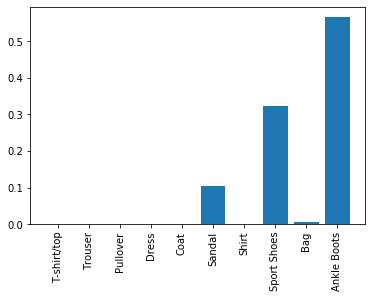

In [8]:
FMNIST_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sport Shoes','Bag','Ankle Boots']
plt.xticks(np.arange(10),labels=FMNIST_labels,rotation='vertical')
plt.bar(np.arange(10), nps)

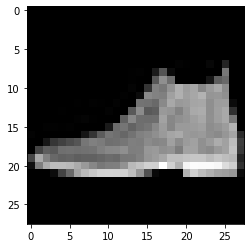

In [9]:
def denormalize(tensor):
  tensor = tensor*0.5 + 0.5
  return tensor
  
img = img.view(28,-1)
img = denormalize(img)
plt.imshow(img,cmap='gray')

In [10]:
with torch.no_grad():
    num_correct = 0
    total = 0

    cnt = 0
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        print(output)
        cnt+=1
        
        if cnt > 0:
          break

tensor([[2.2987e-06, 2.8792e-07, 5.5842e-06, 1.0902e-06, 4.0893e-06, 1.0557e-01,
         6.2482e-06, 3.2249e-01, 6.3645e-03, 5.6556e-01],
        [1.2651e-03, 4.2341e-05, 8.9796e-01, 1.9491e-04, 1.8145e-02, 9.3232e-06,
         8.1576e-02, 5.5742e-09, 8.1121e-04, 3.7417e-07],
        [3.3122e-05, 9.9974e-01, 3.0523e-05, 1.1866e-04, 7.1819e-05, 2.6332e-08,
         2.3254e-07, 6.9684e-07, 8.2650e-09, 1.2897e-08],
        [8.5130e-06, 9.9945e-01, 3.7074e-05, 4.5724e-04, 4.8239e-05, 1.9507e-07,
         1.7763e-07, 3.0950e-06, 1.6353e-08, 8.9749e-08],
        [1.4155e-01, 4.7894e-04, 1.4621e-01, 1.4292e-02, 1.0323e-02, 2.2104e-04,
         6.7774e-01, 1.1851e-06, 9.1706e-03, 1.0661e-05],
        [4.1067e-03, 9.8316e-01, 9.2181e-04, 2.8301e-03, 8.8166e-03, 6.4435e-07,
         1.6020e-04, 5.1460e-06, 2.2881e-06, 3.3813e-07],
        [2.5842e-02, 9.7982e-04, 5.6181e-02, 1.4197e-03, 6.8866e-01, 1.2502e-04,
         2.2326e-01, 1.1390e-06, 3.5322e-03, 1.4894e-06],
        [7.5147e-03, 2.2277

In [11]:
with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)


In [12]:
pred, labels

(tensor([3, 0, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5]),
 tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5]))

In [13]:
pred == labels

tensor([ True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True])

In [14]:
with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)
        num_correct += (pred == labels).sum().item()

    print(f'Accuracy of the model on the 10000 test images: {num_correct * 100 / total}% ')

Accuracy of the model on the 10000 test images: 82.12% 
